## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'Heart_disease_prediction.ipynb', 'README.md']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Luckily, we have no missing values

#### Let's understand our columns better:

In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t"+info[i])

age:	age
sex:	1: male, 0: female
cp:	chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:	resting blood pressure
chol:	 serum cholestoral in mg/dl
fbs:	fasting blood sugar > 120 mg/dl
restecg:	resting electrocardiographic results (values 0,1,2)
thalach:	 maximum heart rate achieved
exang:	exercise induced angina
oldpeak:	oldpeak = ST depression induced by exercise relative to rest
slope:	the slope of the peak exercise ST segment
ca:	number of major vessels (0-3) colored by flourosopy
thal:	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [19]:
dataset["target"].describe()
#print(dataset["target"])

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [20]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [21]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [22]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


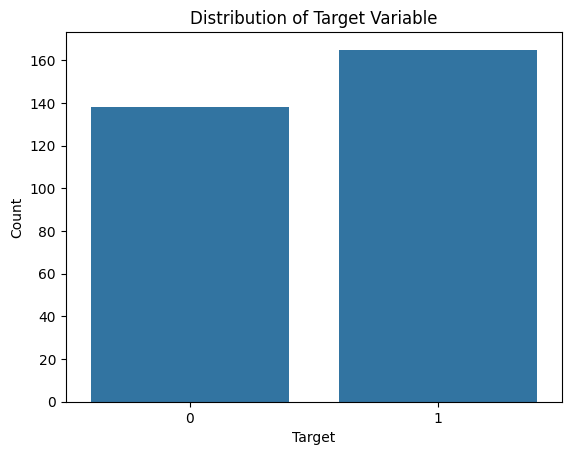

In [25]:
y = dataset["target"]
target_temp = dataset.target.value_counts()
print(target_temp)

sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

#Binary classification problem, where target takes only two values: 0 and 1.

In [27]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [28]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


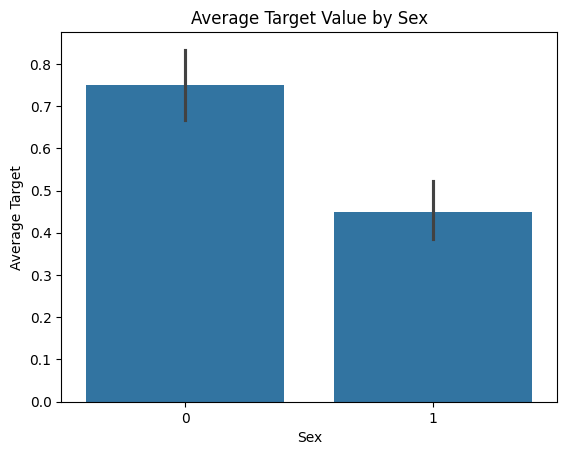

In [30]:
print(dataset.columns)
sns.barplot(x="sex", y="target", data=dataset)
plt.title("Average Target Value by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Target")
plt.show()
#0 -> Females, 1-> Male


##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [31]:
dataset["cp"].unique()

array([3, 2, 1, 0])

Code 0: Typical Angina -> Chest pain related to decreased blood supply to the heart.
Code 1:	Atypical Angina	-> Chest pain not directly related to heart problems.
Code 2:	Non-anginal Pain ->	Chest pain not related to heart or angina (for example, muscle or digestive pain).
Code 3:	Asymptomatic -> No chest pain, but other signs of heart disease are present.

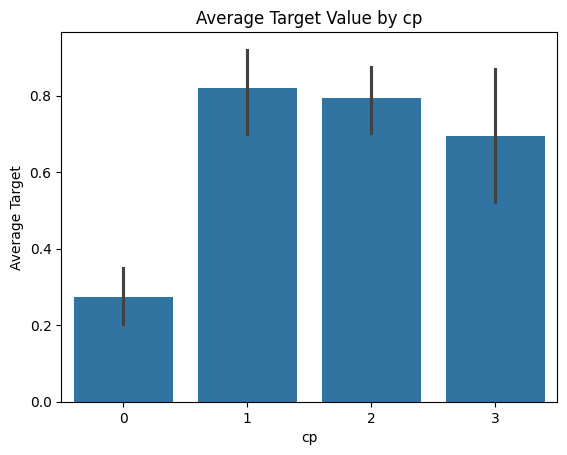

In [38]:
#sns.barplot(dataset["cp"],y)
sns.barplot(x="cp", y="target", data=dataset)
plt.title("Average Target Value by cp")
plt.xlabel("cp")
plt.ylabel("Average Target")
plt.show()

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [39]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [40]:
dataset["fbs"].unique()

array([1, 0])

In the Heart Disease dataset:
Value :1 ->	Fasting blood sugar > 120 mg/dl
Value :0 -> Fasting blood sugar ≤ 120 mg/dl

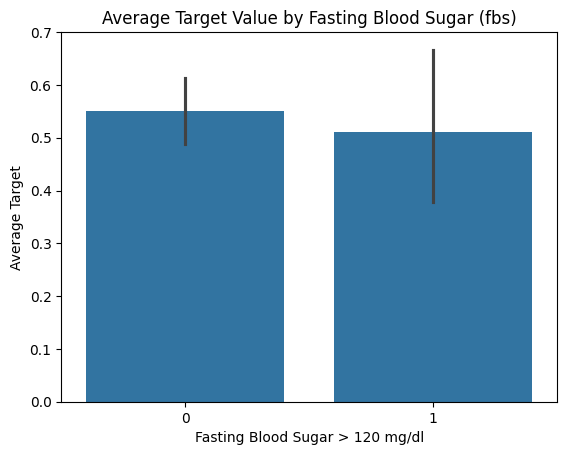

In [42]:
#sns.barplot(dataset["fbs"],y)
#Black lines represent the confidence interval (by default, a 95% confidence interval), add ci=None removes the lines.
sns.barplot(x="fbs", y="target", data=dataset)
plt.title("Average Target Value by Fasting Blood Sugar (fbs)")
plt.xlabel("Fasting Blood Sugar > 120 mg/dl")
plt.ylabel("Average Target")
plt.show()

##### Nothing extraordinary here

### Analysing the restecg feature

In [46]:
dataset["restecg"].unique()

array([0, 1, 2])

In the Heart Disease dataset, restecg represents the resting electrocardiographic (ECG) results:
Value 0 -> Normal
Value 1 -> Having ST-T wave abnormality (T wave inversions or ST elevation/depression > 0.05 mV)
Value 2 -> Showing probable or definite left ventricular hypertrophy (by Estes’ criteria)

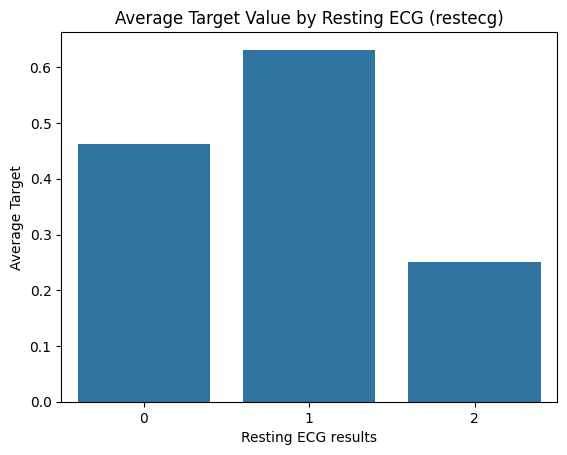

In [47]:
sns.barplot(x="restecg", y="target", data=dataset)
plt.title("Average Target Value by Resting ECG (restecg)")
plt.xlabel("Resting ECG results")
plt.ylabel("Average Target")
plt.show()


##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [48]:
dataset["exang"].unique()

array([0, 1])

In the Heart Disease dataset,
exang stands for Exercise-Induced Angina, and it’s a binary variable:

Value	Meaning
1	Yes — exercise induced angina (chest pain during exercise)
0	No — no exercise-induced angina

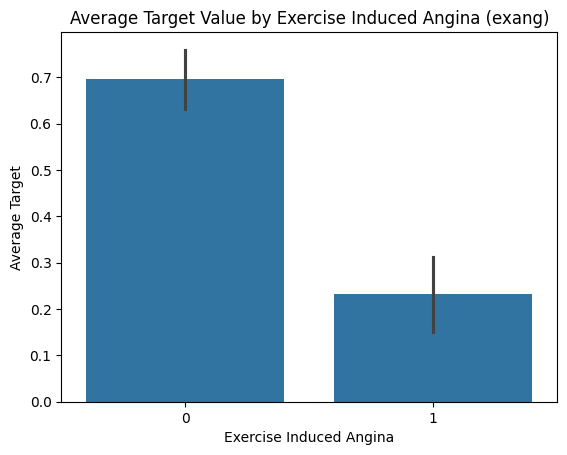

In [51]:
sns.barplot(x="exang", y="target", data=dataset)
plt.title("Average Target Value by Exercise Induced Angina (exang)")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Average Target")
plt.show()


##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [52]:
dataset["slope"].unique()

array([0, 2, 1])

Value	Meaning
0	Upsloping — heart’s response improves with exercise (usually normal)
1	Flat — no change in slope (may indicate heart disease)
2	Downsloping — worsens with exercise (strong indicator of heart disease)

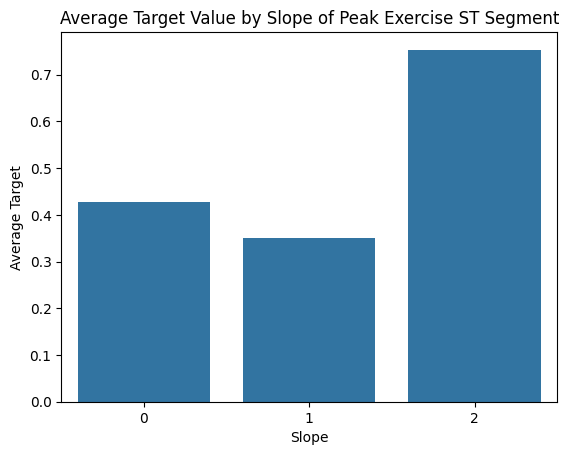

In [55]:
sns.barplot(x="slope", y="target", data=dataset, ci=None)
plt.title("Average Target Value by Slope of Peak Exercise ST Segment")
plt.xlabel("Slope")
plt.ylabel("Average Target")
plt.show()


##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [56]:
#number of major vessels (0-3) colored by flourosopy

In [57]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

In the Heart Disease dataset:

Value	Meaning
0	0 major vessels colored by fluoroscopy
1	1 major vessel
2	2 major vessels
3	3 major vessels
4	4 major vessels

This feature (ca) shows how many major blood vessels were visible in an angiogram.
Higher values (like 3 or 4) often indicate more severe blockages.

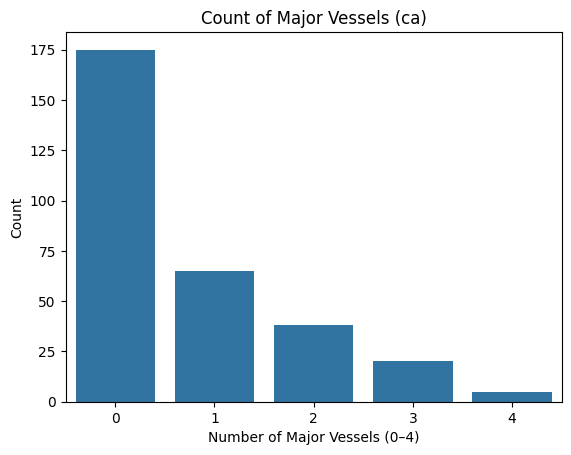

In [59]:
sns.countplot(x="ca", data=dataset)
plt.title("Count of Major Vessels (ca)")
plt.xlabel("Number of Major Vessels (0–4)")
plt.ylabel("Count")
plt.show()

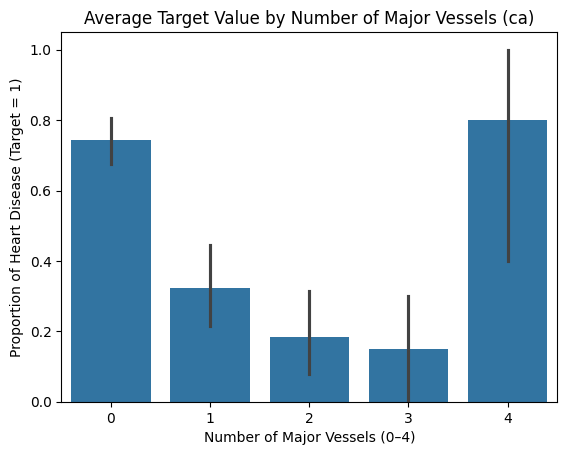

In [60]:
sns.barplot(x="ca", y="target", data=dataset)
plt.title("Average Target Value by Number of Major Vessels (ca)")
plt.xlabel("Number of Major Vessels (0–4)")
plt.ylabel("Proportion of Heart Disease (Target = 1)")
plt.show()


##### ca=4 has astonishingly large number of heart patients

In [61]:
### Analysing the 'thal' feature

In [65]:
dataset["thal"].unique()

array([1, 2, 3, 0])

In the Heart Disease dataset,
thal refers to the Thalassemia test result, a type of blood disorder affecting oxygen transport.

Here are the usual encoded meanings:

Value	Meaning
1	Fixed defect (permanent damage to heart muscle)
2	Normal
3	Reversible defect (damage may be reversible)
0	Sometimes represents missing or undefined data

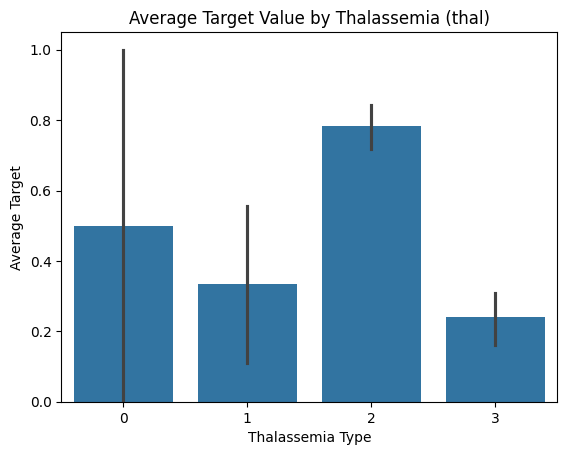

In [66]:
sns.barplot(x="thal", y="target", data=dataset)
plt.title("Average Target Value by Thalassemia (thal)")
plt.xlabel("Thalassemia Type")
plt.ylabel("Average Target")
plt.show()


<Axes: xlabel='thal', ylabel='Density'>

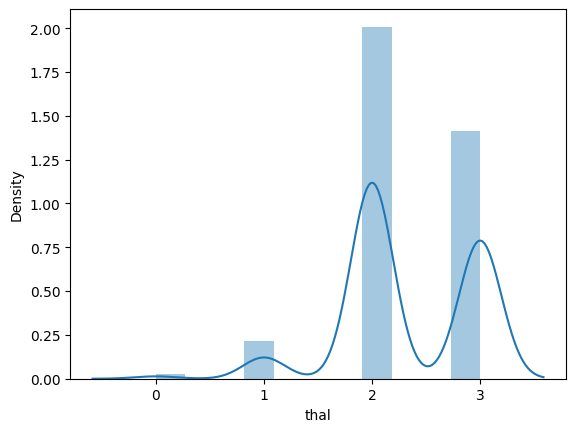

In [67]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [69]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.7 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ------ --------------------------------- 6.3/38.5 MB 30.1 MB/s eta 0:00:02
   ------------- -------------------------- 12.6/38.5 MB 30.0 MB/s eta 0:00:01
   ------------------- -------------------- 18.6/38.5 MB 29.0 MB/s eta 0:00:01
   ------------------------- -------------- 24.4/38.5 MB 28.7 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.5 MB 27.7 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
X_train.shape

(242, 13)

In [71]:
X_test.shape

(61, 13)

In [72]:
Y_train.shape

(242,)

In [73]:
Y_test.shape

(61,)

## V. Model Fitting

In [74]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [76]:
Y_pred_lr.shape

(61,)

In [77]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [79]:
Y_pred_nb.shape

(61,)

In [80]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [81]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [82]:
Y_pred_svm.shape

(61,)

In [83]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [85]:
print(Y_pred_dt.shape)

(61,)


In [86]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [88]:
Y_pred_rf.shape

(61,)

In [89]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


In [96]:
import joblib

joblib.dump(rf, "heart_disease_model.pkl")

['heart_disease_model.pkl']

## VI. Output final score

In [97]:
scores = [score_lr,score_nb,score_svm,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %


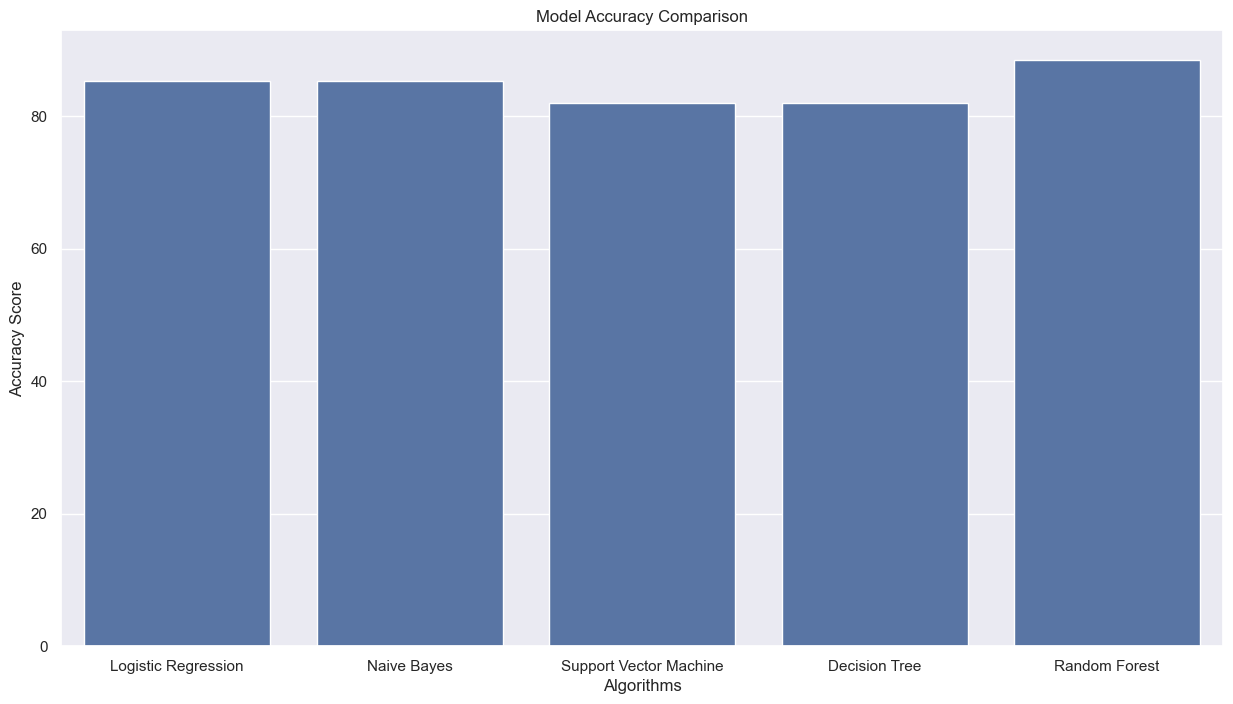

In [98]:
sns.set(rc={'figure.figsize':(15,8)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")

sns.barplot(x=algorithms, y=scores)

plt.show()

###  Random forest has good result as compare to other algorithms <br> <br>

In [99]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,rf.predict(X_test))
cm

array([[24,  3],
       [ 4, 30]])

Model Predictions:

Correctly predicted 24 + 30 = 54 cases

Made 7 errors (3 + 4)

✅ Accuracy = (54 / (24 + 3 + 4 + 30)) × 100 = 88.52%

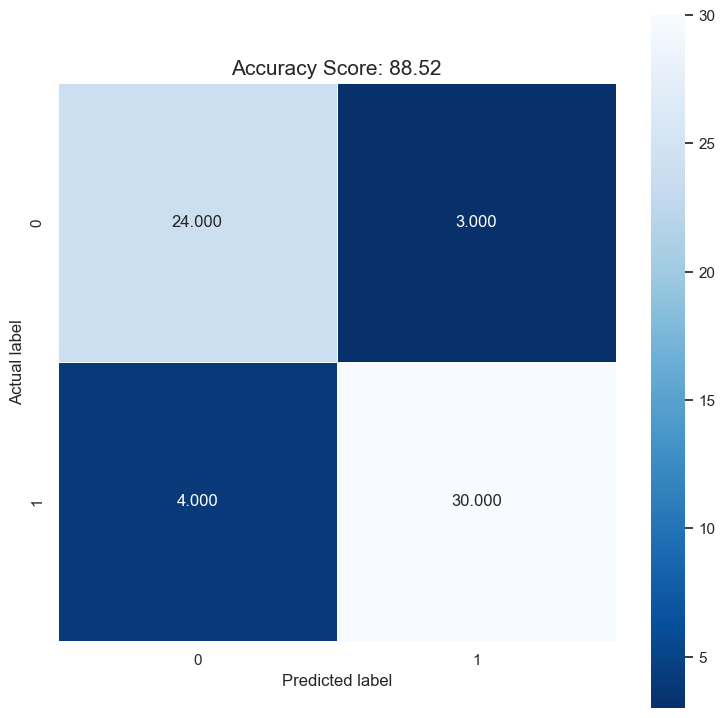

In [100]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_rf)
plt.title(all_sample_title, size = 15);

In [1]:
!jupyter nbconvert --to script Heart_disease_prediction.ipynb

[NbConvertApp] Converting notebook Heart_disease_prediction.ipynb to script
[NbConvertApp] Writing 12361 bytes to Heart_disease_prediction.py
